In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import cv2

In [3]:
# preperation and collection of Data

In [4]:
filename = 'covid--detction'

In [5]:
folder = 'covid--detection'

In [6]:
filenames=os.listdir(folder)

In [7]:
print(filenames) #to print all names of images 

['covid', 'normal']


In [ ]:
covid_filename=os.listdir(f''{folder}/{filenames[0]})

In [ ]:
print(len(covid_filename))

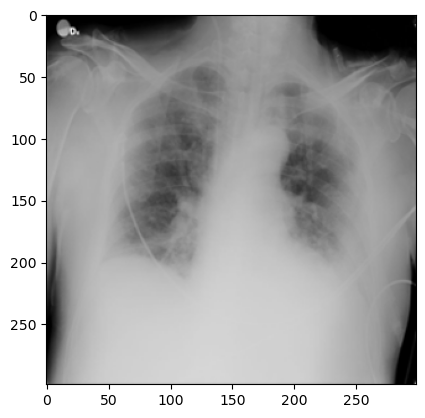

In [36]:
imag1=cv2.imread(f'{folder}/covid/COVID-1.png')
plt.imshow(imag1)


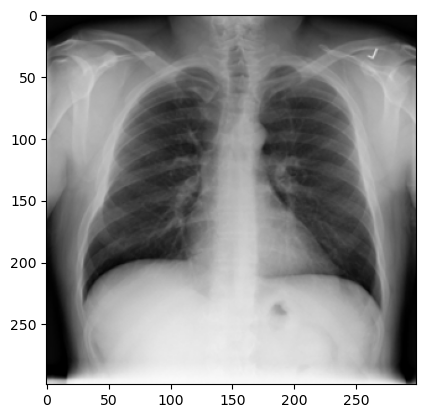

In [46]:
img2=cv2.imread(f'{folder}/normal/Normal-10.png')
plt.imshow(img2)                

In [9]:
def read_images(root_dir, size):
    x=[]
    y=[]
    folder_names = os.listdir(root_dir)
    for folder_name in folder_names:
        file_names = os.listdir(f'{root_dir}/{folder_name}')

        
        for file_name in file_names:
            if 'jpg' or 'JPG' or 'JPEG' or 'jpeg' or 'png' or 'PNG' in filename:
                img = cv2.imread(f'{root_dir}/{folder_name}/{file_name}')
                if img is None:
                    continue
                img = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)
                x.append(img)
                y.append(folder_name)
                
    return (x,y)


In [10]:
root_dir = 'covid--detection'
size = (200,200)
x,y = read_images(root_dir,size)

In [11]:
x = np.array(x)
x.shape

(13808, 200, 200, 3)

In [12]:
np.unique(y)

array(['covid', 'normal'], dtype='<U6')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [23]:
#let us split the train data into test and train
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 12345)

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())


model.add(Dense(125, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 125)               9

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.03, patience=3, mode='auto')

In [26]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test), batch_size=32, callbacks=[es])

Epoch 1/5
324/324 [==============================] - 611s 2s/step - loss: 4.5534 - accuracy: 0.7860 - val_loss: 0.3962 - val_accuracy: 0.7969
Epoch 2/5
324/324 [==============================] - 579s 2s/step - loss: 0.3346 - accuracy: 0.8349 - val_loss: 0.3749 - val_accuracy: 0.8172
Epoch 3/5
324/324 [==============================] - 519s 2s/step - loss: 0.2802 - accuracy: 0.8647 - val_loss: 0.3417 - val_accuracy: 0.8520
Epoch 4/5
324/324 [==============================] - 516s 2s/step - loss: 0.2428 - accuracy: 0.8835 - val_loss: 0.3723 - val_accuracy: 0.8598
Epoch 5/5
324/324 [==============================] - 514s 2s/step - loss: 0.1952 - accuracy: 0.9088 - val_loss: 0.4430 - val_accuracy: 0.8722


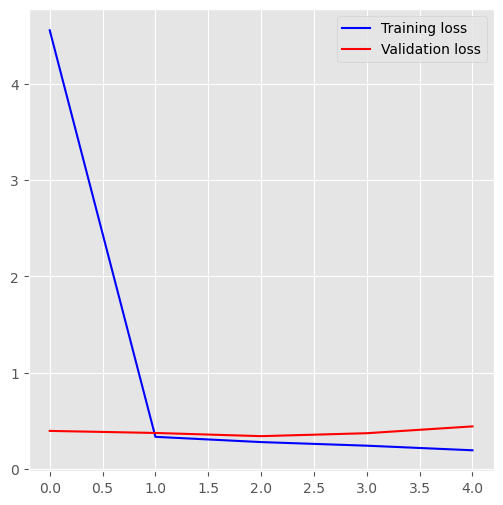

<Figure size 640x480 with 0 Axes>

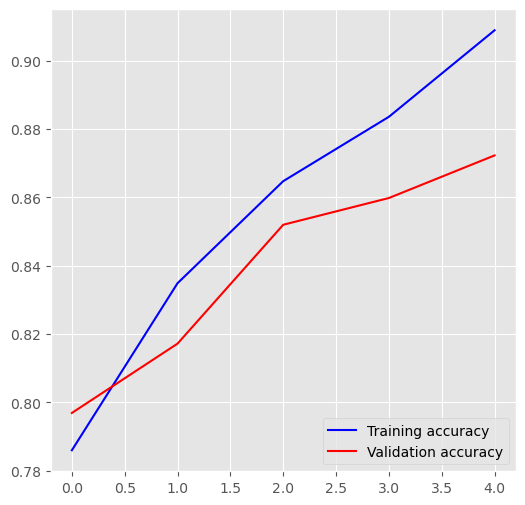

In [27]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()


In [44]:
model.evaluate(x_test,y_test)

108/108 [==============================] - 42s 389ms/step - loss: 0.4430 - accuracy: 0.8722


[0.4430289566516876, 0.8722479939460754]

In [50]:
model.save("COVID.h5")

In [42]:
# to remove or ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [28]:
base_model = VGG16(weights='imagenet',include_top = False,input_shape=x[0].shape)

In [29]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [37]:
model_v16_t = Sequential()
model_v16_t.add(base_model)
model_v16_t.add(Flatten())
model_v16_t.add(Dense(20, activation='relu'))
model_v16_t.add(Dense(10, activation='relu'))
model_v16_t.add(Dense(2, activation='sigmoid'))


base_model.trainable=False

In [38]:
model_v16_t.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 20)                368660    
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
Total params: 15,083,580
Trainable params: 368,892
Non-trainable params: 14,714,688
_________________________________________________________________


In [39]:
model_v16_t.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_v16_t.fit(x, y, epochs=1,validation_split=0.1, batch_size=32)

389/389 [==============================] - 3412s 9s/step - loss: 0.3604 - accuracy: 0.9149 - val_loss: 0.1173 - val_accuracy: 0.9573


In [ ]:
CONCLUSION:-USEFUL IN
         1 Strategic Planning of W.H.O in PCR(polymerse chain reaction and Vaccine production)
         2 Drug Inventory Management(pneumoniae,fatique,cough cold,fever,Heart Attack)
         3 Medical Lab Managemet(oxygen cylinder,ICU Bed,staff Management)       
                